In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [134]:
SET1='W5000-H5000-MP30-Mochila30-PP1'
SET2='W5000-H5000-MP30-Mochila30-PP2'
SET3='W5000-H5000-MP30-Mochila30-PP3'
SET4='W500-H500-MP30-Mochila30-PP2'
SET5='W1000-H1000-MP30-Mochila30-PP2'
SET6='W1000-H1000-MP10-Mochila30-PP2'
SET7='W1000-H1000-MP5-Mochila5-PP2'

df = pd.read_csv('data_set/out-'+SET1+'.csv')
df.head(2)

,opcion_greedy,opcion_busqueda,cant_gim,cant_gim_mismo_costo,cant_poke,cap_mochila,tiempo_armado_grafo,tiempo_greedy,distancia_camino_greedy,tiempo_busqueda,distancia_camino,cant_mejoras,tiempo_swap,vecinos_prom
0,1,0.0,10.0,1.0,42.0,30.0,867685.0,223932.0,56769.376618,6279339.0,54889.736666,7.0,6121301.0,3634.0
1,1,0.0,10.0,1.0,42.0,30.0,867685.0,218366.0,56769.376618,5696848.0,54889.736666,7.0,5577715.0,3634.0


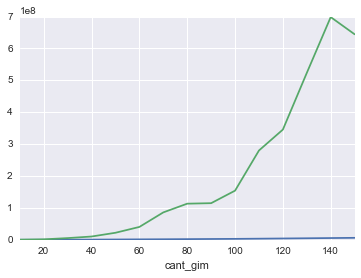

In [64]:
%matplotlib inline
df.groupby('cant_gim').mean()['tiempo_greedy'].plot()
df.groupby('cant_gim').mean()['tiempo_busqueda'].plot()
plt.show()

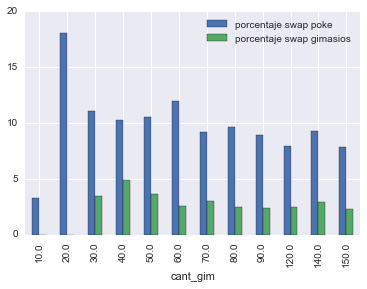

In [135]:
new_df = df.groupby(['opcion_busqueda','cant_gim']).mean()[['distancia_camino_greedy','distancia_camino']]

new_df['mejora'] = new_df['distancia_camino_greedy']-new_df['distancia_camino']
new_df['porcentaje'] = (new_df['mejora']*100)/new_df['distancia_camino_greedy']

data = new_df.ix[0][['porcentaje']].rename(columns={'porcentaje': 'porcentaje swap poke'})

data['porcentaje swap gimasios'] = new_df.ix[1][['porcentaje']]

data.plot(kind='bar')
sns.plt.show()

# new_df[['distancia_camino_greedy','distancia_camino']].plot(kind='bar')
# sns.plt.show()

# sns.barplot(data=new_df)
# sns.plt.show()